### This chapter will be some basic implementation of some basic ML algorithms


In [36]:
# 1. Linear regression

import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from torch.autograd import Variable


In [10]:
# hyper parameters:
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

# input data: just some point (x,y)

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

print(x_train.size)

15


In [28]:
# build the LR model
class LinearRegression(nn.Module):
    # remember: self mean the instance itself
    def __init__(self,input_size,output_size):
        
        super().__init__() # in python2: super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self,x):
        output = self.linear(x)
        return output


    

In [32]:

Model = LinearRegression(input_size, output_size)
# optimization process

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(Model.parameters(),lr = learning_rate)

# Training process
for epoch in range(num_epochs):
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    #Clears the gradients of all optimized Variable
    optimizer.zero_grad()
    outputs = Model(inputs)
    loss = criterion(outputs, targets) # Note the CAN NOT repalce order
    loss.backward()
    optimizer.step()
    
    # print the training info
    if (epoch % 5==0):
        print('Epoch [%d/%d], Loss:%.5f'
             % (epoch, num_epochs, loss.data[0]))
                       

Epoch [0/100], Loss:1.07894
Epoch [5/100], Loss:0.53896
Epoch [10/100], Loss:0.32020
Epoch [15/100], Loss:0.23158
Epoch [20/100], Loss:0.19567
Epoch [25/100], Loss:0.18112
Epoch [30/100], Loss:0.17522
Epoch [35/100], Loss:0.17283
Epoch [40/100], Loss:0.17185
Epoch [45/100], Loss:0.17146
Epoch [50/100], Loss:0.17129
Epoch [55/100], Loss:0.17122
Epoch [60/100], Loss:0.17119
Epoch [65/100], Loss:0.17117
Epoch [70/100], Loss:0.17116
Epoch [75/100], Loss:0.17116
Epoch [80/100], Loss:0.17115
Epoch [85/100], Loss:0.17114
Epoch [90/100], Loss:0.17114
Epoch [95/100], Loss:0.17113


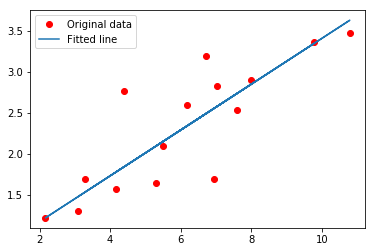

In [38]:
#Visualization with plot
pred = Model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, 'ro',label = 'Original data')
plt.plot(x_train,pred, label = 'Fitted line')
plt.legend()
plt.show()